## Voting Classifier

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from util import plot_decision_regions

In [18]:
# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=None)
clf2 = MLPClassifier(solver='lbfgs', learning_rate_init=0.01, hidden_layer_sizes=(4, 3), max_iter=3000, random_state=12)
clf3 = SVC(kernel='rbf', random_state=12)
eclf = VotingClassifier(estimators=[('dt', clf1), ('mlp', clf2),
                                    ('svc', clf3)],
                        voting='hard', weights=[1, 2, 2])

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, rando...f',
  max_iter=-1, probability=False, random_state=12, shrinking=True,
  tol=0.001, verbose=False))],
         n_jobs=1, voting='hard', weights=[1, 2, 2])

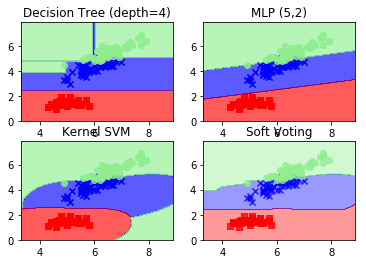

In [19]:
for idx, clf, tt in zip(np.arange(4),[clf1, clf2, clf3, eclf],  ['Decision Tree (depth=4)', 'MLP (4,3)',
                         'Kernel SVM', 'Hard Voting']):
    # Plot
    plt.subplot(2, 2, idx + 1).set_title(tt)
    plt.axis("tight")
    plot_decision_regions(X, y, classifier=clf, ds= iris)
    plt.axis("tight")
plt.show()

## Bagging Classifier

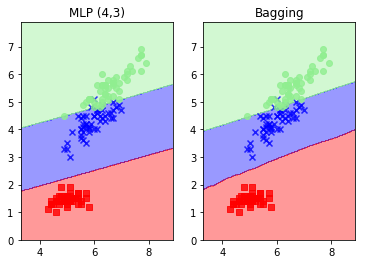

In [20]:
from sklearn.ensemble import BaggingClassifier

clf = MLPClassifier(solver='lbfgs', learning_rate_init=0.01, hidden_layer_sizes=(4, 3), max_iter=3000, random_state=12)
bag = BaggingClassifier(clf, n_estimators=100, max_samples=0.8,
                        random_state=1)
clf.fit(X,y)
bag.fit(X, y)

for idx, clf, tt in zip(np.arange(2),[clf, bag],  ['MLP (4,3)', 'Bagging']):
    # Plot
    plt.subplot(1, 2, idx + 1).set_title(tt)
    plt.axis("tight")
    plot_decision_regions(X, y, classifier=clf, ds= iris)
    plt.axis("tight")
plt.show()

## Bagging de Árboles (Random Forests)

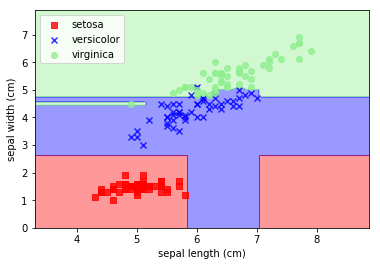

In [25]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(criterion='entropy',n_estimators=5, random_state=1)
clf.fit(X,y)

plot_decision_regions(X, y, classifier=clf,ds=iris)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(loc='upper left')
plt.show()

## Ahora un poco de Boosting (AdaBoost)

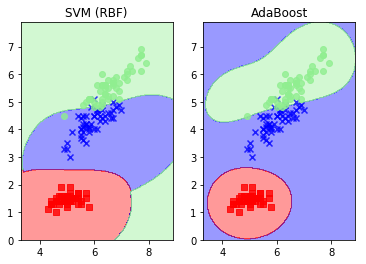

In [30]:
from sklearn.ensemble import AdaBoostClassifier

clf = SVC(kernel='rbf', probability=True)
ada = AdaBoostClassifier(base_estimator=clf,
                         n_estimators=100, 
                         learning_rate=0.1,
                         random_state=12)
clf.fit(X, y)
ada.fit(X, y)

for idx, clf, tt in zip(np.arange(2),[clf, ada],  ['SVM (RBF)', 'AdaBoost']):
    # Plot
    plt.subplot(1, 2, idx + 1).set_title(tt)
    plt.axis("tight")
    plot_decision_regions(X, y, classifier=clf, ds= iris)
    plt.axis("tight")
plt.show()

#plot_decision_regions(X, y, classifier=ada,ds=iris)
#plt.xlabel(iris.feature_names[0])
#plt.ylabel(iris.feature_names[1])
#plt.legend(loc='upper left')
#plt.show()